## Basic integration problems

Summing vortices in a vortex sheet from a elliptically loaded lifting line requires the 
evaluation of a difficult integral prove that the downwash is constant.  

Rather than in-lining and glossing over this tricky calculation 
within the mathematical explanation, we bring it up and solve it 
here so that we may quote it properly when it is applied.

The task is to prove that ([Eq 12.58](https://web.stanford.edu/~cantwell/AA200_Course_Material/AA200_Course_Notes/AA200_Ch_12_Wings_of_Finite_Span_Cantwell.pdf)):
$$\int_{- \frac{\pi}{2}}^{\frac{\pi}{2}} \frac{\sin{\left (x \right )}}{\sin{\left (b \right )} - \sin{\left (x \right )}}\, dx = \pi$$
while treating the singularity at $x=b$ properly.  

The answer for $b=0$ is obvious.



In [1]:
# Using sympy to do symbolic manipulations
import sympy as sp
sp.init_printing()
from IPython.display import display
x, a, b = sp.symbols("x a b", real=True)


Define:


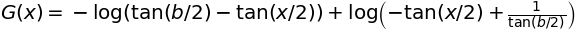

In [2]:
F1 = sp.Function("G")(x)
F1expr = -(sp.log((sp.tan(-x/2)+sp.tan(b/2))) - sp.log((sp.tan(-x/2) + 1/sp.tan(b/2))))
print("Define:")
display(sp.Eq(F1, F1expr))


Then:


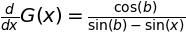

In [3]:
dF1 = sp.diff(F1, x)
dF1expr = dF1.subs(F1, F1expr).doit().simplify().simplify()
print("Then:")
display(sp.Eq(dF1, dF1expr))

In [4]:
F = sp.Function("F")(x)
Fexpr = F1*sp.tan(b) - x
print("Define:")
display(sp.Eq(F, Fexpr))

Define:


Then:


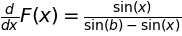

In [5]:
dF = sp.diff(F, x)
dFexpr = dF.subs(F, Fexpr).doit().simplify().subs(dF1, dF1expr).simplify()
print("Then:")
display(sp.Eq(dF, dFexpr))

If there was no singularity, then:


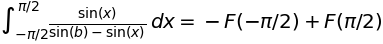

And since:


where:


which expands to:


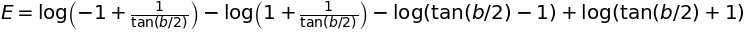

But then:


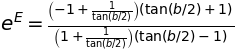

which simplifies to:


So that the result of the integral would be:


Which can't be true because the integrand is always real in the interval.


In [8]:
f = sp.Function("f")(x)
intdF = sp.integrate(f, (x, -sp.pi/2, sp.pi/2)).subs(f, dFexpr)
print("If there was no singularity, then:")
display(sp.Eq(intdF, F.subs(x, sp.pi/2) - F.subs(x, -sp.pi/2)))

print("And since:")
r1 = F.subs(x, sp.pi/2) - F.subs(x, -sp.pi/2)
r2 = Fexpr.subs(x, sp.pi/2) - Fexpr.subs(x, -sp.pi/2)
E = sp.Symbol("E")
Eexpr = F1.subs(x, sp.pi/2) - F1.subs(x, -sp.pi/2)
r4 = E*sp.tan(b) - sp.pi
r4expr = Eexpr*sp.tan(b) - sp.pi
r42 = sp.Eq(r4expr, r2)
assert r42.simplify() == True
display(sp.Eq(r1, r4))
print("where:")
display(sp.Eq(E, Eexpr))

print("which expands to:")
Eexpre = F1expr.subs(x, sp.pi/2) - F1expr.subs(x, -sp.pi/2)
display(sp.Eq(E, Eexpre))

print("But then:")
display(sp.Eq(sp.exp(E), sp.exp(Eexpre)))
print("which simplifies to:")
display(sp.Eq(sp.exp(E), sp.exp(Eexpre).simplify()))

print("So that the result of the integral would be:")
display(sp.I*sp.pi*sp.tan(b) - sp.pi)
print("Which can't be true because the integrand is always real in the interval.")